In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import files
uploaded=files.upload()

TypeError: ignored

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

NameError: ignored

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
x=df.drop('label',axis=1)


In [ ]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
y=df['label']

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df.shape

(20800, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
#removing the title(we won't use it for analysis)
df.drop(["title"],axis=1,inplace=True)
df.head()

,id,author,text,label
0,0,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#removing the author(we won't use it for analysis)
df.drop(["author"],axis=1,inplace=True)
df.head()

,id,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#removing the id(we won't use it for analysis)
df.drop(["id"],axis=1,inplace=True)
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df = df[df['text'].notna()]

In [ ]:
df.shape

(20761, 3)

In [ ]:
df.reset_index(inplace=True)

ValueError: ignored

In [ ]:
df.shape

(20761, 4)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Removing punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)



In [ ]:
# Removing stopwords
import nltk
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


label
0    10387
1    10374
Name: text, dtype: int64


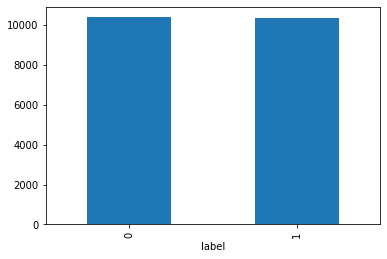

In [ ]:
# How many fake and real articles?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

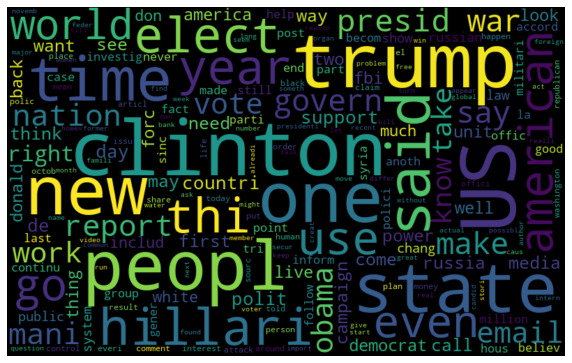

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df[df["label"] == 1]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

       level_0  index                                               text  label
1            1      1  ever get feel life circl roundabout rather hea...      0
5            5      5  In tri time jacki mason voic reason In week’ e...      0
7            7      7  pari — franc chose idealist tradit candid sund...      0
8            8      8  donald J trump schedul make highli anticip vis...      0
9            9      9  A week michael T flynn resign nation secur adv...      0
...        ...    ...                                                ...    ...
20753    20792  20792  two suicid bomber attack bu station jakarta we...      0
20755    20794  20794  donald trump took twitter friday prais vladimi...      0
20756    20795  20795  rapper T I unload black celebr met donald trum...      0
20757    20796  20796  when green bay packer lost washington redskin ...      0
20758    20797  20797  the macy’ today grew union sever great name am...      0

[10387 rows x 4 columns]


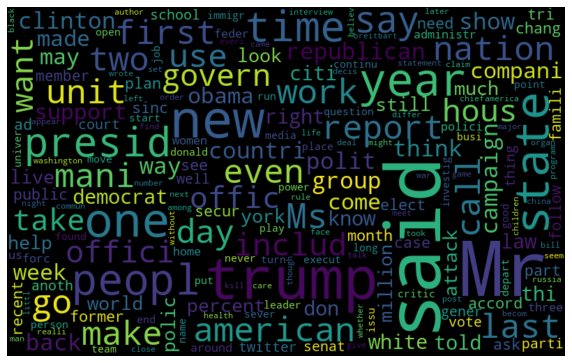

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["label"] == 0]
print(fake_data)
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
countV = CountVectorizer(ngram_range=(1,3))
train_count = countV.fit_transform(df["text"].values)

In [ ]:
countV.vocabulary_

{'hous': 4780454,
 'dem': 2756416,
 'aid': 474040,
 'we': 11125349,
 'didn': 2880997,
 'even': 3462448,
 'see': 8972759,
 'comey': 2104367,
 'letter': 5747571,
 'until': 10786259,
 'jason': 5324551,
 'chaffetz': 1789888,
 'tweet': 10646945,
 'it': 5259343,
 'by': 1564139,
 'darrel': 2604134,
 'lucu': 5984697,
 'octob': 6994076,
 '30': 157991,
 '2016': 118562,
 'subscrib': 9762841,
 'stump': 9749284,
 'american': 630859,
 'fork': 3985963,
 'utah': 10861974,
 'imag': 4899023,
 'courtesi': 2458453,
 'michael': 6329329,
 'jolley': 5374478,
 'avail': 1013537,
 'creativ': 2488225,
 'commonsbi': 2138313,
 'licens': 5772260,
 'with': 11335329,
 'apolog': 770984,
 'keith': 5445029,
 'olbermann': 7057552,
 'doubt': 3066453,
 'worst': 11438675,
 'person': 7497070,
 'the': 10089487,
 'world': 11415359,
 'week': 11168130,
 'fbi': 3734348,
 'director': 2926259,
 'jame': 5313162,
 'but': 1531231,
 'accord': 273663,
 'democrat': 2765029,
 'look': 5930021,
 'like': 5796562,
 'also': 569354,
 'know': 55

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['text'], df.label, test_size=0.33, random_state=42)

NameError: ignored

In [4]:
from sklearn.pipeline import pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     learning_curve)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

ImportError: ignored

In [ ]:
lr_pipeline = Pipeline([
    ('lrCV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 1))),
    ('lr_clf', LogisticRegression(C=0.0001,random_state=42, n_jobs=-1))
])